# Regression

Mount drive

In [1]:
"""from google.colab import drive                                                                        
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

#user_path = 'LCL/CFL_Thesis/Data/'  #directory WM
user_path = 'LUX/Mirabelle/'  #directory JP

base_dir = root_dir + user_path """

'from google.colab import drive                                                                        \ndrive.mount(\'/content/gdrive\', force_remount=True)\nroot_dir = "/content/gdrive/My Drive/"\n\n#user_path = \'LCL/CFL_Thesis/Data/\'  #directory WM\nuser_path = \'LUX/Mirabelle/\'  #directory JP\n\nbase_dir = root_dir + user_path '

Importing libraries

In [2]:
base_dir = './'

In [3]:
#!pip install pycaret
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.spatial.distance import cdist
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


#ignore log(0) and divide by 0 warning
np.seterr(divide = 'ignore');
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 


print('Libraries read!')


Libraries read!


# Loading processed data

In [4]:
df = pd.read_csv(
    #base_dir + 
    'df_processed_ml.csv')
print('Shape: ', df.shape)
df.head()

Shape:  (13894, 8)


,teu_count,train_length,total_distance_trip,departure_delay,arrival_delay,distance_between_control_stations,weight_per_length_of_train,weight_per_wagon_of_train
0,27.00,544.0,842.641085,4.0,-3.0,37.648801,1.543105,52.465562
1,27.00,544.0,842.641085,5.0,-137.0,351.112938,1.543105,52.465562
2,27.00,544.0,842.641085,30.0,2.0,96.509384,1.543105,52.465562
3,0.00,34.0,815.308053,258.0,66.0,815.308053,1.029412,35.000000
4,60.75,544.0,823.108788,33.0,24.0,37.648801,2.334463,79.371750


profile = ProfileReport(df, title='Pandas Profiling Report')
profile

## Feature Engineering

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13894 entries, 0 to 13893
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   teu_count                          13894 non-null  float64
 1   train_length                       13894 non-null  float64
 2   total_distance_trip                13894 non-null  float64
 3   departure_delay                    13894 non-null  float64
 4   arrival_delay                      13894 non-null  float64
 5   distance_between_control_stations  13894 non-null  float64
 6   weight_per_length_of_train         13894 non-null  float64
 7   weight_per_wagon_of_train          13894 non-null  float64
dtypes: float64(8)
memory usage: 868.5 KB


In [6]:
df.describe(include='all')

,teu_count,train_length,total_distance_trip,departure_delay,arrival_delay,distance_between_control_stations,weight_per_length_of_train,weight_per_wagon_of_train
count,13894.000000,13894.000000,13894.000000,13894.000000,13894.000000,13894.000000,13894.000000,13894.000000
mean,59.024552,536.541817,547.526374,84.585792,78.403771,126.583518,2.203449,67.147480
std,20.954303,136.161078,274.099797,237.320179,245.377804,172.749059,0.525775,16.478913
min,0.000000,14.000000,84.507306,-260.000000,-289.000000,1.456555,0.907077,19.080000
25%,48.295000,482.000000,310.118028,-12.000000,-21.000000,27.872309,1.893750,54.996333
50%,64.500000,544.000000,648.635532,20.000000,12.000000,74.186862,2.171699,69.459000
75%,72.000000,646.000000,822.135405,87.000000,81.750000,151.301458,2.520779,80.989524
max,98.360000,720.000000,1454.139924,1562.000000,1570.000000,815.308053,4.083522,119.340000


In [7]:
df.isnull().sum()

teu_count                            0
train_length                         0
total_distance_trip                  0
departure_delay                      0
arrival_delay                        0
distance_between_control_stations    0
weight_per_length_of_train           0
weight_per_wagon_of_train            0
dtype: int64

In [8]:
#Filling the null values with the median, because the null values in them are low...

df.fillna(df.median(), inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

teu_count                            0
train_length                         0
total_distance_trip                  0
departure_delay                      0
arrival_delay                        0
distance_between_control_stations    0
weight_per_length_of_train           0
weight_per_wagon_of_train            0
dtype: int64

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13894 entries, 0 to 13893
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   teu_count                          13894 non-null  float64
 1   train_length                       13894 non-null  float64
 2   total_distance_trip                13894 non-null  float64
 3   departure_delay                    13894 non-null  float64
 4   arrival_delay                      13894 non-null  float64
 5   distance_between_control_stations  13894 non-null  float64
 6   weight_per_length_of_train         13894 non-null  float64
 7   weight_per_wagon_of_train          13894 non-null  float64
dtypes: float64(8)
memory usage: 976.9 KB


In order to demonstrate the predict_model() function on unseen data, a sample of 10% has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 10% records were not available at the time when the machine learning experiment was performed.

data = merged_data.sample(frac=0.9, random_state=42)
data_unseen = merged_data.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))



# Modeling

In [10]:
# Importing module and initialising setup
from pycaret.regression import *


regressor_merged_data = setup(data = df,
                              target = 'arrival_delay',
                              session_id = 42,
                              normalize = True,
                              #transformation = True,            # This is because target feature is not normally distributed
                              #transformation_method = 'yeo-johnson',
                              #transform_target = True,          # This is because target feature is not normally distributed
                              #transform_target_method = 'yeo-johnson',
                              combine_rare_levels = True,
                              rare_level_threshold = 0.05,
                              use_gpu = True,
                              log_experiment = True, 
                              experiment_name = 'cfl_reg',
                              silent=True
                              #bin_numeric_features = ['train_tare_weight', 'Journey_Distance', 'Max_TEU', 'TEU_Count', 'Max_Length', 'Train_Length', 'Train_Weight_Pounds', 'uvIndex']
                             )

,Description,Value
0,session_id,42
1,Target,arrival_delay
2,Original Data,"(13894, 8)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(9725, 7)"


In [11]:
# Adding a custom metric
def calculate_rMSE(y, y_pred):
    """
    Calculating the rMSE in percentage
    """
    return mean_squared_error(y_pred, y)/np.var(y)

# add_metric to Pycaret
add_metric('rMSE', 'relative_MSE', calculate_rMSE, greater_is_better=False)

Name                                                      relative_MSE
Display Name                                              relative_MSE
Score Function             <function calculate_rMSE at 0x7fbf2c978700>
Scorer               make_scorer(calculate_rMSE, greater_is_better=...
Target                                                            pred
Args                                                                {}
Greater is Better                                                False
Custom                                                            True
Name: rMSE, dtype: object

In [12]:
best_models = compare_models(turbo=True, 
                             exclude=['xgboost'],
                             sort='rMSE',
                             n_select = 3) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,38.8949,8280.6992,89.1560,0.8579,1.0888,1.3339,0.1421,0.1420
catboost,CatBoost Regressor,38.1221,8304.4289,89.0924,0.8575,1.0832,1.3208,0.1425,2.0730
gbr,Gradient Boosting Regressor,39.3627,8354.3086,89.4589,0.8566,1.1138,1.3203,0.1434,0.9140
lr,Linear Regression,41.9439,8784.2333,91.9817,0.8486,1.1476,1.4737,0.1514,0.0150
ridge,Ridge Regression,41.9460,8784.2292,91.9819,0.8486,1.1476,1.4737,0.1514,0.0080
br,Bayesian Ridge,41.9465,8784.2374,91.9820,0.8486,1.1477,1.4736,0.1514,0.0250
lasso,Lasso Regression,41.9038,8791.3474,92.0497,0.8484,1.1405,1.4641,0.1516,0.0210
huber,Huber Regressor,40.7514,8887.7040,92.4548,0.8467,1.1303,1.4297,0.1533,0.0570
omp,Orthogonal Matching Pursuit,41.8729,8895.8822,92.6133,0.8464,1.1424,1.4509,0.1536,0.0050
rf,Random Forest Regressor,40.8605,8950.1541,93.1675,0.8451,1.1195,1.4807,0.1549,1.1600


## LightGBM

In [26]:
lightgbm = create_model(estimator = 'lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE
0,35.9701,6184.7662,78.6433,0.9143,1.0442,1.2536,0.0857
1,38.3376,6760.2797,82.2209,0.8839,1.0859,1.2576,0.1161
2,35.8036,5345.0826,73.1101,0.8818,1.0610,1.4079,0.1182
3,39.4381,8243.0552,90.7913,0.8581,1.0694,1.1008,0.1419
4,38.6591,5554.0625,74.5256,0.8587,1.0987,1.5390,0.1413
5,41.7009,9830.4441,99.1486,0.8316,1.0734,1.2715,0.1684
6,44.6315,14865.3177,121.9234,0.7716,1.1941,1.2821,0.2284
7,35.4369,8317.6337,91.2011,0.8630,1.0635,1.2481,0.1370
8,43.5667,13794.1058,117.4483,0.7678,1.1680,1.5362,0.2322
9,35.4048,3912.2441,62.5479,0.9484,1.0301,1.4419,0.0516


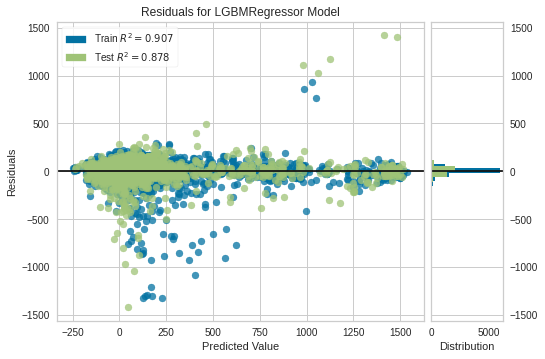

In [13]:
plot_model(estimator = lightgbm, plot = 'residuals')

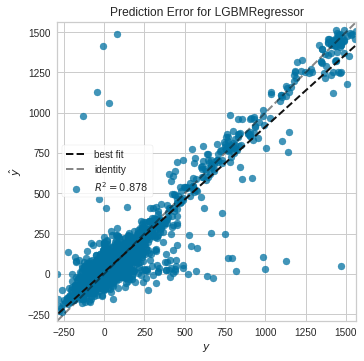

In [14]:
plot_model(estimator = lightgbm, plot = 'error')

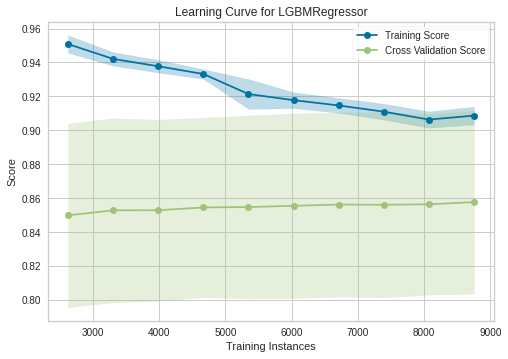

In [176]:
plot_model(estimator = lightgbm, plot = 'learning')

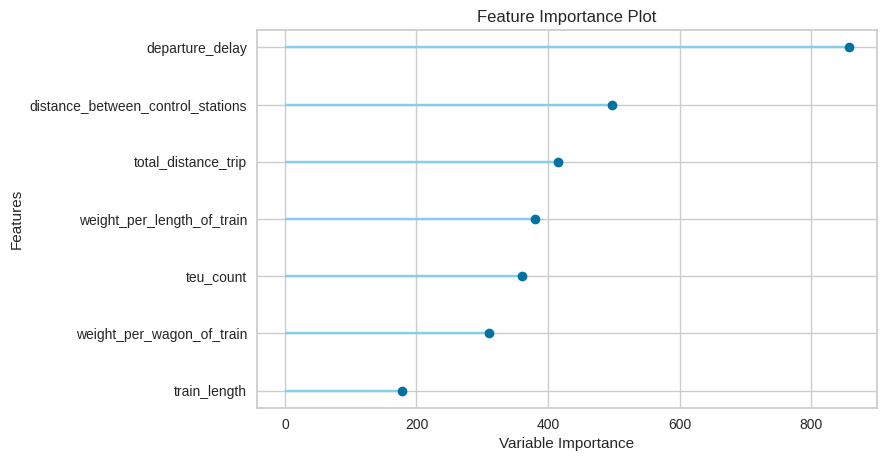

In [177]:
plot_model(estimator = lightgbm, plot = 'feature')

In [23]:
parameters_lightgbm = plot_model(estimator = lightgbm, plot = 'parameter')
type(parameters_lightgbm)

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


NoneType

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

C extension was not built during install!


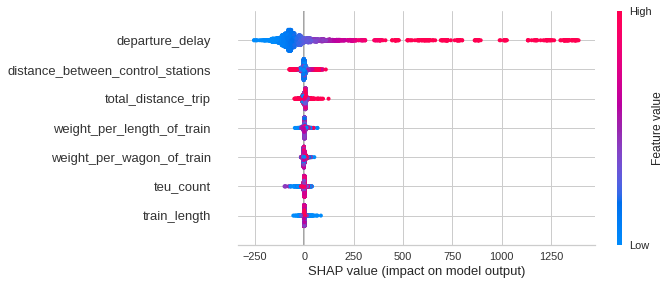

In [15]:
interpret_model(estimator = lightgbm)

## Tuned LightGBM

In [179]:
tuned_lightgbm = tune_model(estimator = lightgbm, optimize = 'rMSE', n_iter=30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE
0,37.6831,6316.7909,79.4782,0.9124,1.1037,1.3677,0.0876
1,40.9804,6734.8200,82.0659,0.8844,1.1635,1.4034,0.1156
2,36.6044,5241.9117,72.4010,0.8840,1.0235,1.4299,0.1160
3,38.4249,8031.1303,89.6166,0.8618,1.0592,1.1543,0.1382
4,40.0502,5485.4539,74.0639,0.8605,1.1106,1.8067,0.1395
5,42.0606,9666.8994,98.3204,0.8344,1.1016,1.4097,0.1656
6,46.5118,14951.4371,122.2761,0.7702,1.1820,1.5284,0.2298
7,38.7778,8550.0906,92.4667,0.8592,1.1243,1.5835,0.1408
8,45.2053,13685.5243,116.9851,0.7696,1.1970,1.5914,0.2304
9,36.4451,3906.9473,62.5056,0.9485,1.0575,1.5177,0.0515


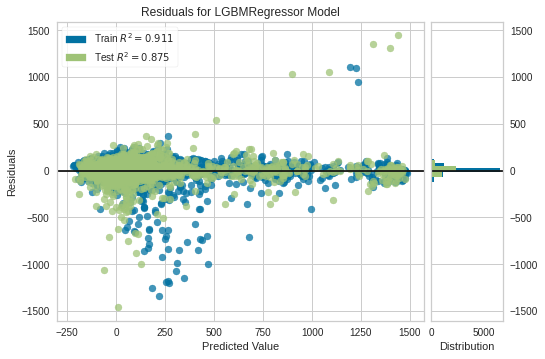

In [180]:
plot_model(estimator = tuned_lightgbm, plot = 'residuals')

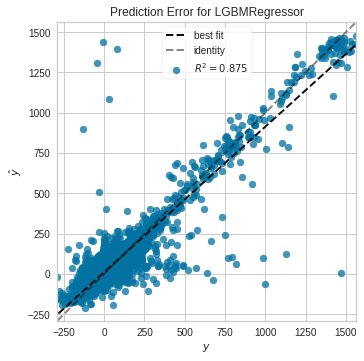

In [181]:
plot_model(estimator = tuned_lightgbm, plot = 'error')

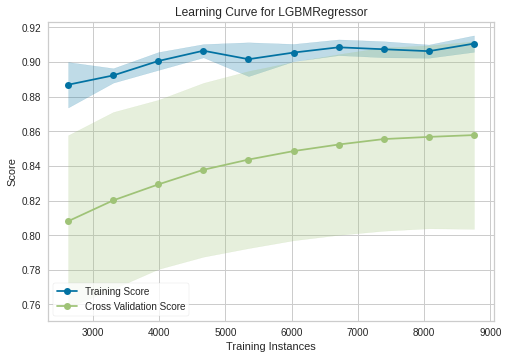

In [182]:
plot_model(estimator = tuned_lightgbm, plot = 'learning')

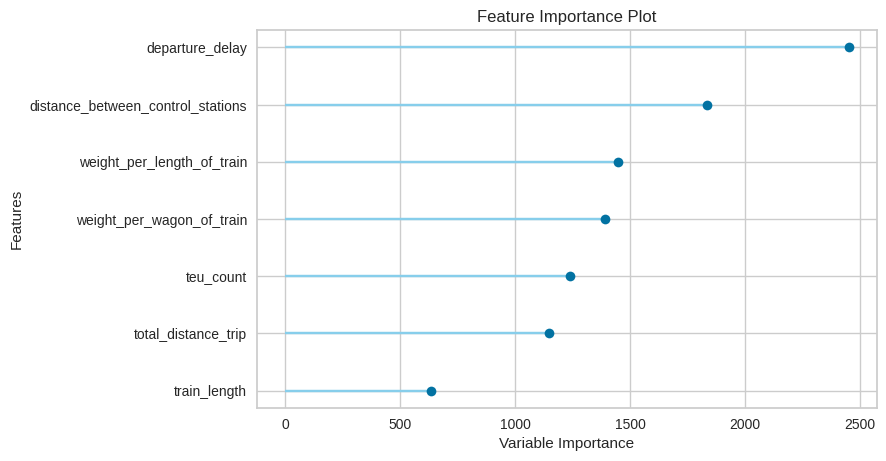

In [183]:
plot_model(estimator = tuned_lightgbm, plot = 'feature')

C extension was not built during install!


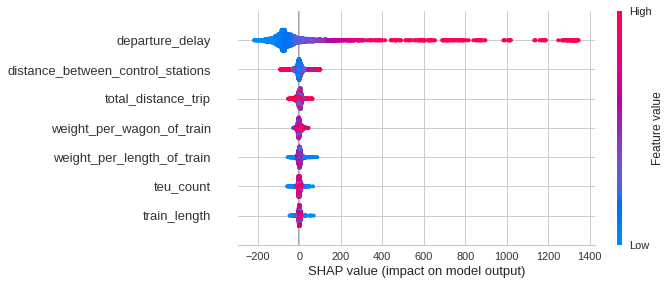

In [184]:
interpret_model(estimator = tuned_lightgbm)

## CatBoost

In [185]:
catboost = create_model(estimator = 'catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE
0,35.2683,6208.5752,78.7945,0.9139,1.0357,1.2463,0.0861
1,38.4975,7004.4973,83.6929,0.8798,1.0825,1.2262,0.1202
2,35.1452,5196.6232,72.0876,0.8851,1.0295,1.3282,0.1149
3,38.1117,8207.9681,90.5978,0.8588,1.0679,1.1629,0.1412
4,37.7654,5574.0023,74.6592,0.8582,1.1066,1.5771,0.1418
5,40.3580,9753.1406,98.7580,0.8329,1.0456,1.2447,0.1671
6,45.2854,15283.3027,123.6257,0.7651,1.1648,1.4377,0.2349
7,35.2883,8260.3462,90.8864,0.8640,1.1087,1.3019,0.1360
8,43.2845,14031.2482,118.4536,0.7638,1.1762,1.4780,0.2362
9,32.2162,3524.5853,59.3682,0.9535,1.0141,1.2051,0.0465


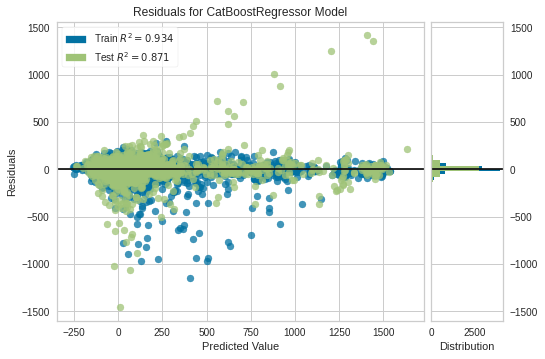

In [186]:
plot_model(estimator = catboost, plot = 'residuals')

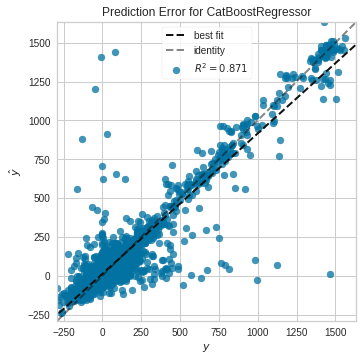

In [187]:
plot_model(estimator = catboost, plot = 'error')

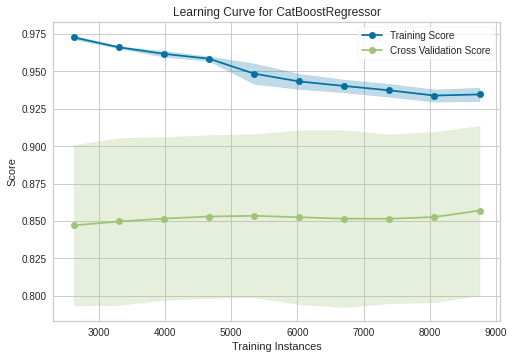

In [188]:
plot_model(estimator = catboost, plot = 'learning')

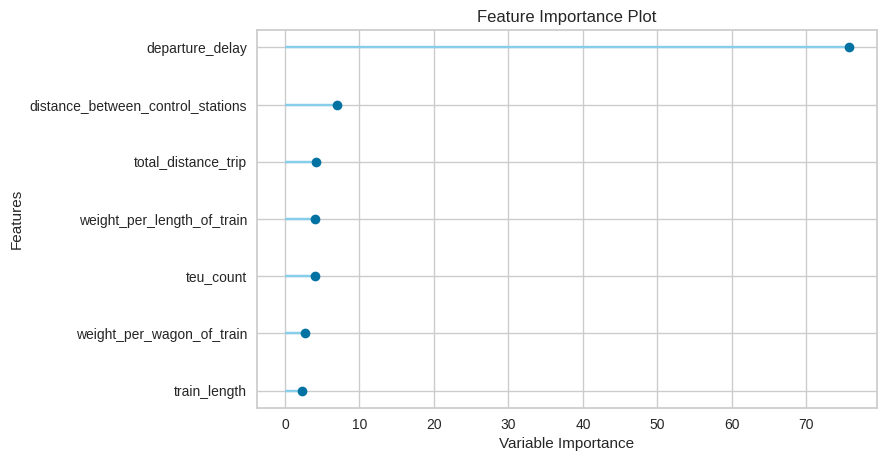

In [189]:
plot_model(estimator = catboost, plot = 'feature')

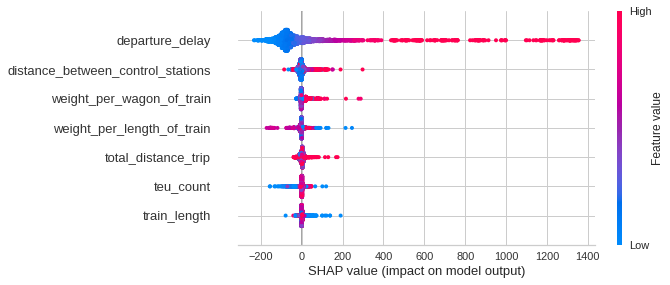

In [190]:
interpret_model(estimator = catboost)

## Tuned CatBoost

In [191]:
tuned_catboost = tune_model(estimator = catboost, optimize = 'rMSE', n_iter=30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE
0,36.7082,6033.9285,77.6784,0.9164,1.1139,1.2111,0.0836
1,39.4069,6935.3998,83.2790,0.8809,1.1703,1.1847,0.1191
2,35.6690,5056.0888,71.1062,0.8882,1.0613,1.3471,0.1118
3,39.5033,8318.6428,91.2066,0.8568,1.1329,1.0553,0.1432
4,38.8242,5574.2227,74.6607,0.8582,1.1304,1.5717,0.1418
5,42.3280,9815.1040,99.0712,0.8319,1.1591,1.2911,0.1681
6,45.5895,14928.0860,122.1805,0.7706,1.2279,1.2925,0.2294
7,37.6207,8474.0240,92.0545,0.8604,1.0606,1.3619,0.1396
8,44.3166,13720.5230,117.1346,0.7690,1.2183,1.4032,0.2310
9,33.9769,3706.3973,60.8802,0.9511,1.0767,1.3378,0.0489


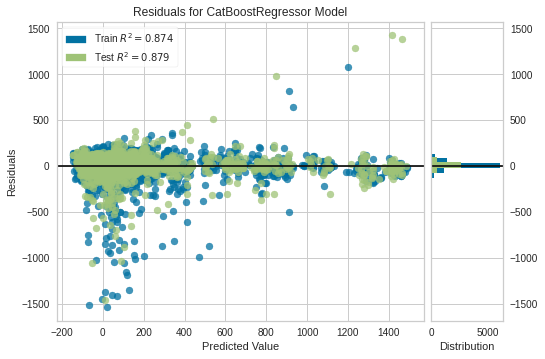

In [192]:
plot_model(estimator = tuned_catboost, plot = 'residuals')

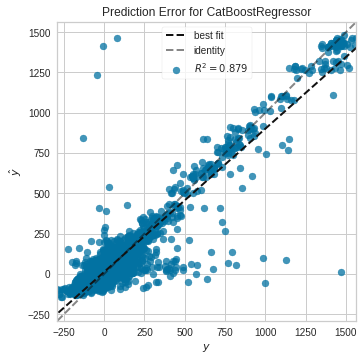

In [193]:
plot_model(estimator = tuned_catboost, plot = 'error')

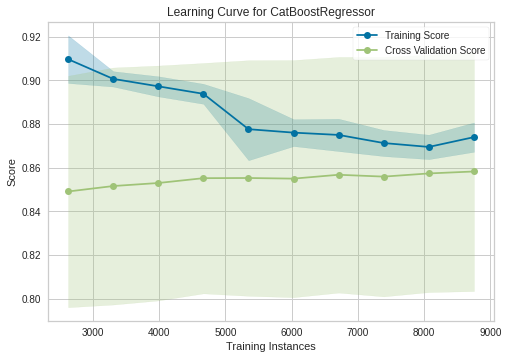

In [194]:
plot_model(estimator = tuned_catboost, plot = 'learning')

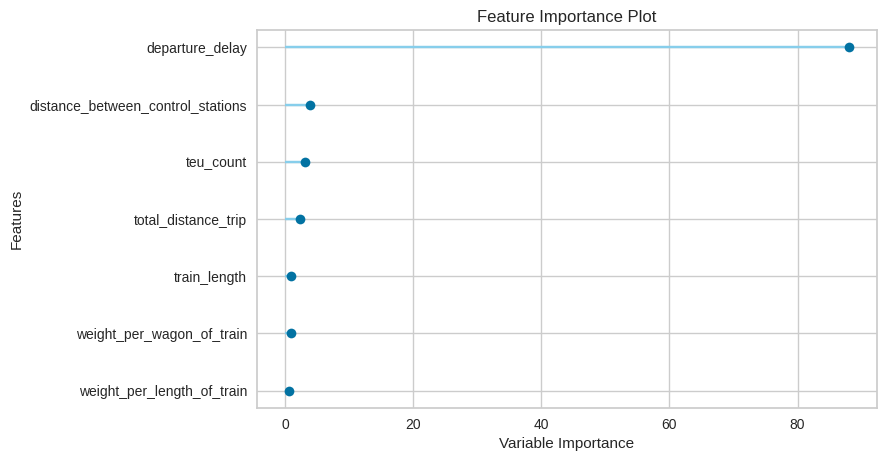

In [195]:
plot_model(estimator = tuned_catboost, plot = 'feature')

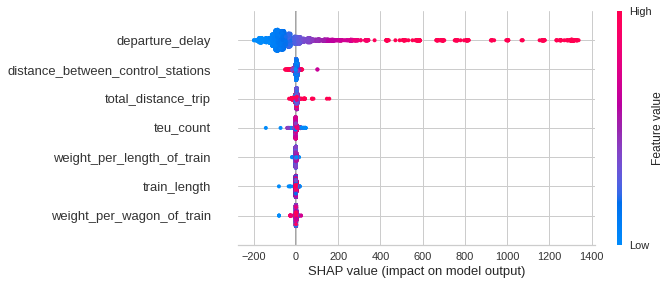

In [196]:
interpret_model(estimator = tuned_catboost)

## Gradient Boosting

In [197]:
gbr = create_model(estimator = 'gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE
0,35.8336,6069.3923,77.9063,0.9159,1.0519,1.1714,0.0841
1,38.6801,6800.2531,82.4636,0.8833,1.1398,1.2689,0.1167
2,36.2027,5175.1081,71.9382,0.8855,1.0193,1.3807,0.1145
3,39.4255,8472.1164,92.0441,0.8542,1.1195,1.0506,0.1458
4,39.5486,5649.9933,75.1664,0.8563,1.1086,1.6454,0.1437
5,42.1926,10089.1221,100.4446,0.8272,1.1447,1.2522,0.1728
6,45.2747,14844.5913,121.8384,0.7719,1.1990,1.2737,0.2281
7,37.7847,8522.7667,92.3188,0.8596,1.0687,1.3802,0.1404
8,44.6824,14120.2361,118.8286,0.7623,1.2313,1.4317,0.2377
9,34.0021,3799.5063,61.6401,0.9499,1.0554,1.3481,0.0501


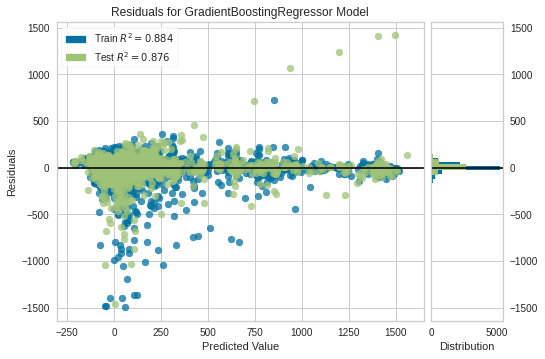

In [198]:
plot_model(estimator = gbr, plot = 'residuals')

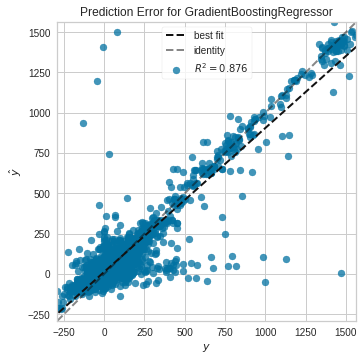

In [199]:
plot_model(estimator = gbr, plot = 'error')

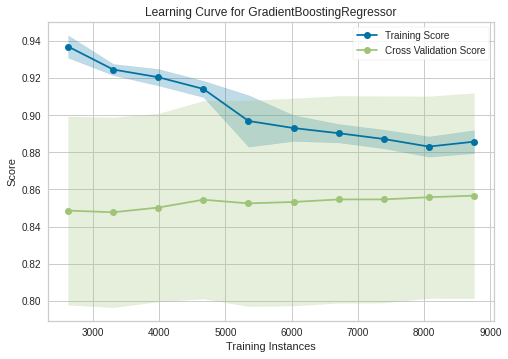

In [200]:
plot_model(estimator = gbr, plot = 'learning')

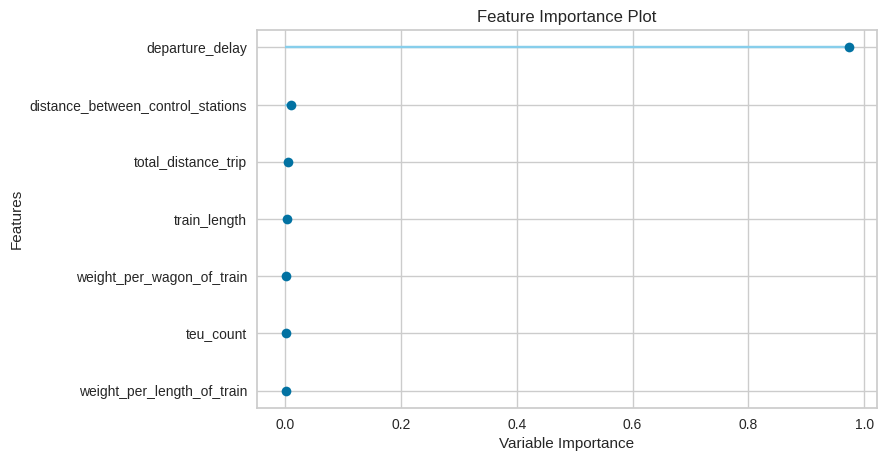

In [201]:
plot_model(estimator = gbr, plot = 'feature')

interpret_model(estimator = gbr)

## Tuned Gradient Boosting

In [202]:
tuned_gbr = tune_model(estimator = gbr, optimize = 'rMSE', n_iter=30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE
0,36.2012,5912.8318,76.8949,0.9180,1.0404,1.2697,0.0820
1,39.8321,6805.3340,82.4944,0.8832,1.1192,1.2680,0.1168
2,35.7639,5266.0513,72.5676,0.8835,1.0484,1.3142,0.1165
3,39.1983,8262.1476,90.8964,0.8578,1.0559,1.0833,0.1422
4,39.7819,5724.5303,75.6606,0.8544,1.1361,1.5447,0.1456
5,41.9335,9722.0074,98.6002,0.8335,1.0666,1.2186,0.1665
6,45.7044,15046.5670,122.6644,0.7688,1.1875,1.4024,0.2312
7,36.7787,8341.7625,91.3332,0.8626,1.1263,1.3454,0.1374
8,45.5457,13832.6184,117.6122,0.7671,1.1906,1.5777,0.2329
9,35.6040,3615.6232,60.1301,0.9523,1.0798,1.3442,0.0477


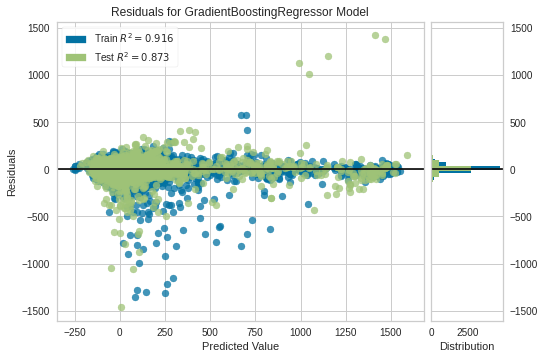

In [203]:
plot_model(estimator = tuned_gbr, plot = 'residuals')

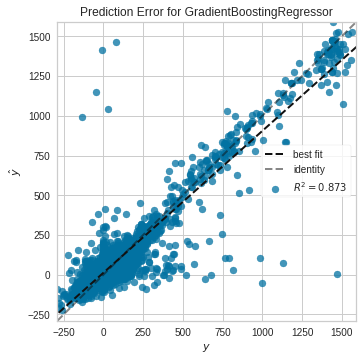

In [204]:
plot_model(estimator = tuned_gbr, plot = 'error')

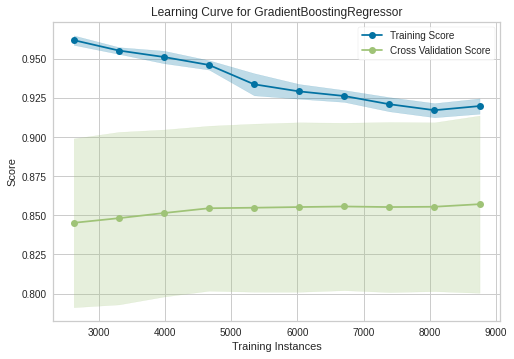

In [205]:
plot_model(estimator = tuned_gbr, plot = 'learning')

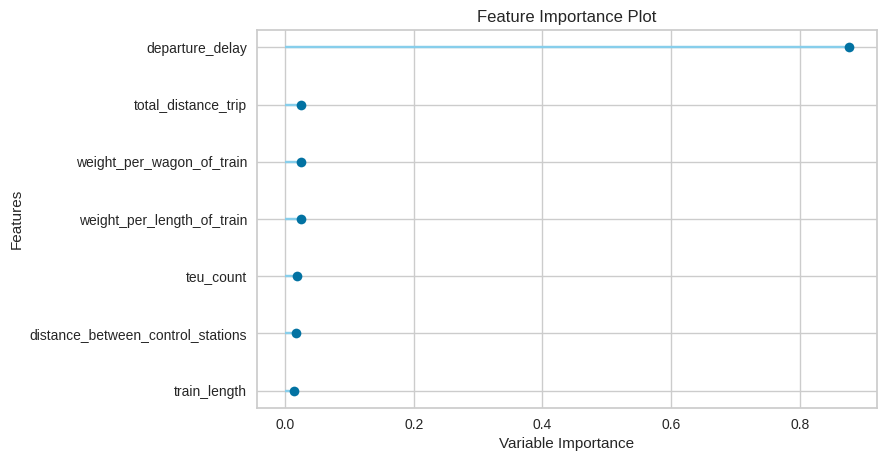

In [206]:
plot_model(estimator = tuned_gbr, plot = 'feature')

interpret_model(estimator = tuned_gbr)

# Ensemble models

In [207]:
# lets create a simple dt
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE
0,49.2970,12145.5416,110.2068,0.8317,1.2070,1.7909,0.1683
1,52.9209,16310.6454,127.7131,0.7200,1.2533,1.8897,0.2800
2,50.9630,16101.8818,126.8932,0.6438,1.2612,1.8832,0.3562
3,53.4430,14852.8386,121.8722,0.7444,1.2618,1.7427,0.2556
4,56.9342,16242.8499,127.4474,0.5868,1.3450,2.5566,0.4132
5,57.7222,17694.9362,133.0223,0.6969,1.3269,2.0181,0.3031
6,55.6862,19373.7870,139.1898,0.7023,1.3073,2.0914,0.2977
7,48.9362,14957.4218,122.3005,0.7537,1.2710,2.1643,0.2463
8,65.6512,26024.1409,161.3200,0.5619,1.3236,2.5012,0.4381
9,48.2274,11798.3796,108.6203,0.8444,1.1970,2.2489,0.1556


In [208]:
# Bagging
bagged_dt = ensemble_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE
0,40.5201,7537.7579,86.8203,0.8955,1.1100,1.6255,0.1045
1,44.8430,9306.7956,96.4717,0.8402,1.1479,1.4749,0.1598
2,43.7035,8170.3907,90.3902,0.8193,1.1215,1.6203,0.1807
3,41.8126,9302.9787,96.4519,0.8399,1.0918,1.3369,0.1601
4,45.0295,7844.2168,88.5676,0.8005,1.1516,2.0247,0.1995
5,46.4956,10930.0246,104.5468,0.8128,1.1654,1.5255,0.1872
6,48.1912,15558.9684,124.7356,0.7609,1.2047,1.5968,0.2391
7,38.9698,9185.4122,95.8406,0.8487,1.1125,1.4396,0.1513
8,48.3709,14699.7007,121.2423,0.7526,1.1984,1.7770,0.2474
9,39.2177,5116.1564,71.5273,0.9325,1.0924,1.7269,0.0675


In [209]:
# Bagging with more estimators
bagged_dt2 = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE
0,36.9937,6516.1850,80.7229,0.9097,1.0661,1.5098,0.0903
1,41.2959,7908.8101,88.9315,0.8642,1.0986,1.3047,0.1358
2,39.8445,6742.9864,82.1157,0.8508,1.0606,1.5225,0.1492
3,40.2675,8609.0503,92.7850,0.8519,1.1059,1.2457,0.1481
4,43.0925,7122.0550,84.3923,0.8188,1.1354,1.9761,0.1812
5,43.3110,10222.8915,101.1083,0.8249,1.1301,1.3157,0.1751
6,46.3500,15088.9945,122.8373,0.7681,1.1695,1.4733,0.2319
7,37.1811,8535.4829,92.3877,0.8594,1.1228,1.3955,0.1406
8,46.0077,14136.5143,118.8971,0.7620,1.1891,1.6514,0.2380
9,36.9574,4602.0680,67.8385,0.9393,1.0917,1.4871,0.0607


In [210]:
# Boosting
boosted_dt = ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE
0,36.1973,6956.6598,83.4066,0.9036,1.1003,1.1622,0.0964
1,38.3649,7649.8325,87.4633,0.8687,1.1573,1.1842,0.1313
2,38.4892,7340.9188,85.6792,0.8376,1.2165,1.4796,0.1624
3,37.6262,8265.1005,90.9126,0.8578,1.1453,1.0682,0.1422
4,41.2199,8458.8520,91.9720,0.7848,1.1645,1.5696,0.2152
5,41.4733,11356.2757,106.5658,0.8055,1.2506,1.2297,0.1945
6,46.7840,16846.8992,129.7956,0.7411,1.2092,1.2513,0.2589
7,38.7397,10874.9228,104.2829,0.8209,1.2221,1.3750,0.1791
8,45.3683,15095.1008,122.8621,0.7459,1.2043,1.4493,0.2541
9,34.1193,4839.6749,69.5678,0.9362,1.0508,1.2238,0.0638


In [211]:
# Blending models
# train individual models to blend
lightgbm = create_model('lightgbm', verbose = False)
dt = create_model('dt', verbose = False)
lr = create_model('lr', verbose = False)

# blend individual models
blender = blend_models(estimator_list = [lightgbm, dt, lr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE
0,36.9450,6323.0023,79.5173,0.9124,1.0910,1.2853,0.0876
1,39.8752,7888.2248,88.8157,0.8646,1.1161,1.3196,0.1354
2,37.0755,6404.3425,80.0271,0.8583,1.0666,1.4084,0.1417
3,40.3578,8734.5777,93.4590,0.8497,1.0852,1.1535,0.1503
4,41.3788,6744.3072,82.1237,0.8284,1.1217,1.7359,0.1716
5,43.6672,10590.5062,102.9102,0.8186,1.1587,1.3225,0.1814
6,45.4901,14787.1524,121.6024,0.7728,1.1549,1.3877,0.2272
7,37.4277,9095.3316,95.3694,0.8502,1.0702,1.3557,0.1498
8,48.0390,15261.3233,123.5367,0.7431,1.2238,1.6271,0.2569
9,35.0037,4527.1384,67.2840,0.9403,1.0272,1.4449,0.0597


In [212]:
print(blender_top3.estimators_)



[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), <catboost.core.CatBoostRegressor object at 0x7f6337bf4550>, GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=N

In [213]:
# Stacking top3 models from compare_models. By default, the meta model (final model to generate predictions) is Linear Regression.
stacker = stack_models(best_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE
0,34.5255,5889.2319,76.7413,0.9184,1.0334,1.2022,0.0816
1,37.5503,6584.3221,81.1438,0.8870,1.1182,1.2205,0.1130
2,34.5309,5010.7735,70.7868,0.8892,1.0287,1.3357,0.1108
3,37.7618,8000.1811,89.4437,0.8623,1.0472,1.0310,0.1377
4,38.0793,5586.8237,74.7451,0.8579,1.1223,1.5536,0.1421
5,40.8051,9701.8496,98.4980,0.8338,1.0803,1.2242,0.1662
6,43.8666,14584.3098,120.7655,0.7759,1.1923,1.2892,0.2241
7,35.2991,8265.1780,90.9130,0.8639,1.0626,1.2660,0.1361
8,42.9490,13755.4387,117.2836,0.7684,1.1751,1.4290,0.2316
9,32.2618,3529.6877,59.4112,0.9534,1.0294,1.2582,0.0466


In [214]:

stacker2 = stack_models(best_models, meta_model = tuned_lightgbm)



,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE
0,37.0795,5949.5572,77.1334,0.9175,1.0630,1.4167,0.0825
1,39.9229,6670.6456,81.6740,0.8855,1.1026,1.4683,0.1145
2,37.3857,5308.7764,72.8614,0.8826,1.0678,1.5572,0.1174
3,40.2857,8527.7568,92.3459,0.8532,1.1275,1.2283,0.1468
4,39.8638,5580.0381,74.6997,0.8581,1.1097,1.7134,0.1419
5,41.5104,9545.3471,97.7003,0.8365,1.0563,1.2070,0.1635
6,46.3265,14808.4026,121.6898,0.7724,1.1937,1.4568,0.2276
7,38.8172,8356.6439,91.4147,0.8624,1.1010,1.5373,0.1376
8,45.3794,13899.2815,117.8952,0.7660,1.1761,1.5545,0.2340
9,36.0223,3877.1583,62.2668,0.9489,1.0776,1.4400,0.0511


# Blender Top 3

In [215]:
# blend top3 models from compare_models
blender_top3 = blend_models(best_models)



,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE
0,34.5172,5926.6123,76.9845,0.9179,1.0242,1.1983,0.0821
1,37.3834,6580.0744,81.1177,0.8870,1.0916,1.2132,0.1130
2,34.5439,5012.1337,70.7964,0.8891,1.0399,1.3334,0.1109
3,37.8320,8005.2162,89.4719,0.8622,1.0736,1.0265,0.1378
4,37.7811,5418.8658,73.6129,0.8622,1.1031,1.5517,0.1378
5,40.7757,9622.6602,98.0952,0.8352,1.0826,1.2319,0.1648
6,44.2095,14746.3344,121.4345,0.7734,1.1859,1.3000,0.2266
7,35.2495,8183.3696,90.4620,0.8652,1.0727,1.2628,0.1348
8,42.9575,13788.5345,117.4246,0.7679,1.1957,1.4353,0.2321
9,32.6083,3531.0219,59.4224,0.9534,1.0499,1.2809,0.0466


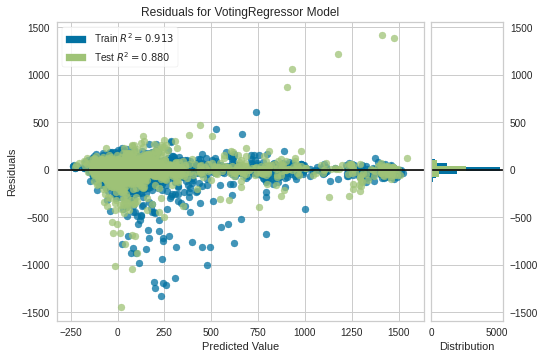

In [216]:
plot_model(estimator = blender_top3, plot = 'residuals')

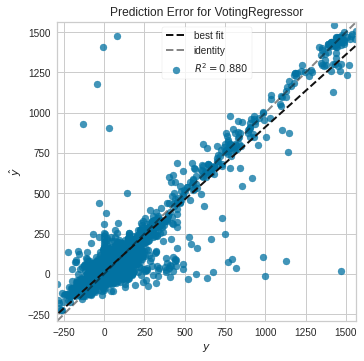

In [217]:
plot_model(estimator = blender_top3, plot = 'error')

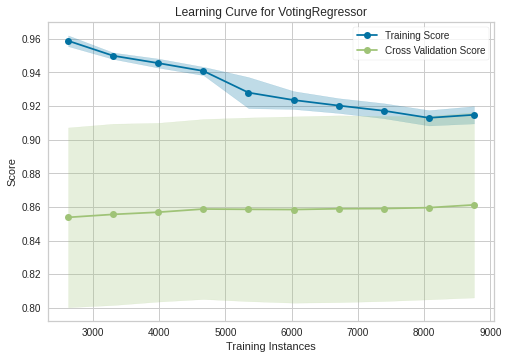

In [218]:
plot_model(estimator = blender_top3, plot = 'learning')

plot_model(estimator = blender_top3, plot = 'feature')

interpret_model(estimator = blender_top3)

## Tuned Blender Top 3

In [219]:
tuned_blender_top3 = tune_model(estimator = blender_top3, optimize = 'rMSE', n_iter=30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE
0,34.5132,5924.1136,76.9683,0.9179,1.0250,1.1972,0.0821
1,37.3862,6580.3976,81.1197,0.8870,1.0928,1.2131,0.1130
2,34.5431,5007.8846,70.7664,0.8892,1.0425,1.3322,0.1108
3,37.8177,8006.1817,89.4773,0.8622,1.0736,1.0246,0.1378
4,37.7919,5419.5219,73.6174,0.8621,1.1055,1.5537,0.1379
5,40.7706,9625.7227,98.1108,0.8351,1.0841,1.2313,0.1649
6,44.2205,14746.9848,121.4372,0.7734,1.1874,1.3007,0.2266
7,35.2851,8185.6688,90.4747,0.8652,1.0765,1.2655,0.1348
8,42.9705,13795.3483,117.4536,0.7678,1.1978,1.4325,0.2322
9,32.5666,3526.4516,59.3839,0.9535,1.0485,1.2785,0.0465


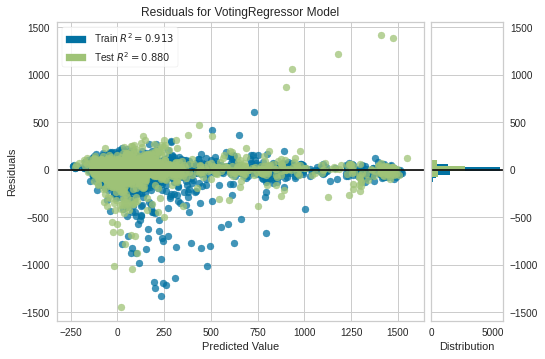

In [220]:
plot_model(estimator = tuned_blender_top3, plot = 'residuals')

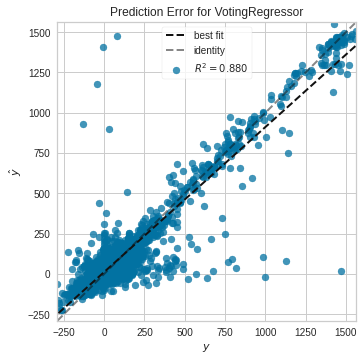

In [221]:
plot_model(estimator = tuned_blender_top3, plot = 'error')

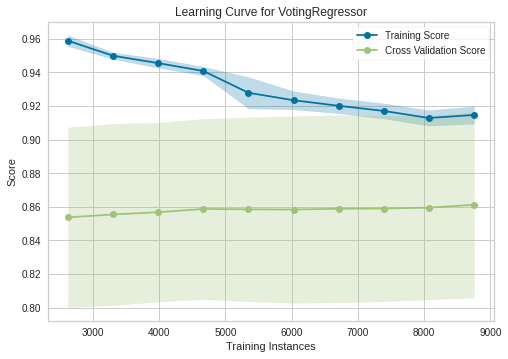

In [222]:
plot_model(estimator = tuned_blender_top3, plot = 'learning')

plot_model(estimator = tuned_blender_top3, plot = 'feature')

interpret_model(estimator = tuned_blender_top3)

# Saving the models

In [43]:
help(get_config)

Help on function get_config in module pycaret.classification:

get_config(variable: str)
    This function retrieves the global variables created when initializing the 
    ``setup`` function. Following variables are accessible:
    
    - X: Transformed dataset (X)
    - y: Transformed dataset (y)  
    - X_train: Transformed train dataset (X)
    - X_test: Transformed test/holdout dataset (X)
    - y_train: Transformed train dataset (y)
    - y_test: Transformed test/holdout dataset (y)
    - seed: random state set through session_id
    - prep_pipe: Transformation pipeline
    - fold_shuffle_param: shuffle parameter used in Kfolds
    - n_jobs_param: n_jobs parameter used in model training
    - html_param: html_param configured through setup
    - create_model_container: results grid storage container
    - master_model_container: model storage container
    - display_container: results display container
    - exp_name_log: Name of experiment
    - logging_param: log_experiment par

In [224]:
get_config('X_test')

,teu_count,train_length,total_distance_trip,departure_delay,distance_between_control_stations,weight_per_length_of_train,weight_per_wagon_of_train
10591,-0.533212,1.052079,-0.409892,-0.436299,-0.634022,-1.031113,-0.645506
7401,1.182828,0.785657,-1.057765,0.360640,-0.304535,2.626898,0.170524
8974,0.396350,0.045597,0.915808,0.476325,1.292065,0.617972,1.145047
12114,0.369462,0.193609,-1.020391,-0.397737,-0.304535,-0.557298,-1.821682
8797,-1.224141,-0.413241,-0.864547,-0.346322,-0.170954,-1.177676,-0.984532
...,...,...,...,...,...,...,...
1195,0.108263,-0.028409,-0.848550,-0.779068,-0.432614,-0.376664,-0.250549
7603,-0.143814,1.096483,0.523055,-0.102099,-0.416391,-0.288348,-0.005382
1423,-0.035781,0.045597,1.009572,-0.744791,-0.018986,-1.570706,-1.231388
6927,0.504382,0.045597,1.005360,-0.384883,-0.515193,-0.342574,0.102100


In [225]:
#Finalise Models for Deployment
final_lightgbm = finalize_model(lightgbm)
final_tuned_lightgbm = finalize_model(tuned_lightgbm)
final_catboost = finalize_model(catboost)
final_tuned_catboost = finalize_model(tuned_catboost)
final_gbr = finalize_model(gbr)
final_tuned_gbr = finalize_model(tuned_gbr)

[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 

In [226]:
# Saving final models
save_model(final_lightgbm, base_dir + 'short_term_models/regression_lightgbm_short_term')
save_model(final_tuned_lightgbm, base_dir + 'short_term_models/regression_tuned_lightgbm_short_term')
save_model(final_catboost, base_dir + 'short_term_models/regression_catboost_short_term')
save_model(final_tuned_catboost, base_dir + 'short_term_models/regression_tuned_catboost_short_term')
save_model(final_gbr, base_dir + 'short_term_models/regression_gbr_short_term')
save_model(final_tuned_gbr, base_dir + 'short_term_models/regression_tuned_gbr_short_term')

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='arrival_delay',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                            learning_rate=0.05, loss='ls',
                                            max_depth=6, max_features='sqrt',
                                            max_leaf_nodes=None,
                                            min_impurity

# Loading regression lightgbm

In [24]:
from pycaret.regression import *
model = load_model(base_dir + 'short_term_models/regression_lightgbm_short_term')
print(type(model))

Transformation Pipeline and Model Successfully Loaded
<class 'sklearn.pipeline.Pipeline'>


In [56]:
predictions = predict_model(model)
holdout_score = pull()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,relative_MSE
0,Light Gradient Boosting Machine,33.2925,5102.7283,71.4334,0.9181,1.0727,1.4355,0.0819


In [26]:
df_example = pd.DataFrame([[60, 550, 1200, 15, 650, 30, 70]],
                          columns=['teu_count', 'train_length', 'train_weight', 'wagon_count',
                                   'total_distance_trip', 'departure_delay', 'distance_between_control_stations' ])

df_example['weight_per_length_of_train'] = round(df_example['train_weight'] / df_example['train_length'], 1)
df_example['weight_per_wagon_of_train'] = round(df_example['train_weight'] / df_example['wagon_count'], 1)
df_example.drop(columns=['train_weight', 'wagon_count'], axis=1, inplace=True)
#train_pipe = model[:-1].transform(df_example)


pred_holdouts_ = predict_model(model, data=df_example)
pred_holdouts_.head()

,teu_count,train_length,total_distance_trip,departure_delay,distance_between_control_stations,weight_per_length_of_train,weight_per_wagon_of_train,Label
0,60,550,650,30,70,2.2,80.0,30


In [1]:
import pandas as pd
from pycaret.classification import load_model, predict_model


base_dir = './'

In [3]:
df  = pd.read_csv(base_dir + 'data_to_predict.csv')

In [4]:
df

,teu_count,train_length,train_weight,wagon_count,total_distance_trip,departure_delay,distance_between_control_stations
0,60,550,1200,15,650,30,70


In [5]:
df['weight_per_length_of_train'] = round(df['train_weight'] / df['train_length'], 1)
df['weight_per_wagon_of_train'] = round(df['train_weight'] / df['wagon_count'], 1)
df.drop(columns=['train_weight', 'wagon_count'], axis=1, inplace=True)

In [6]:
df

,teu_count,train_length,total_distance_trip,departure_delay,distance_between_control_stations,weight_per_length_of_train,weight_per_wagon_of_train
0,60,550,650,30,70,2.2,80.0


In [9]:
model = load_model(base_dir + 'short_term_models/regression_lightgbm_short_term')    

Transformation Pipeline and Model Successfully Loaded


In [14]:
df = predict_model(model, df) 
df.rename(columns={'Label': 'arrival_delay'}, inplace=True)
df

,teu_count,train_length,total_distance_trip,departure_delay,distance_between_control_stations,weight_per_length_of_train,weight_per_wagon_of_train,arrival_delay
0,60,550,650,30,70,2.2,80.0,30


### Manually transformation Log to Normal distribution 

cat_predictors = ['Destination_Station', 'Destination_Country', 'Incoterm']

numeric_predictors = ['Journey_Distance', 'Max_TEU', 'TEU_Count', 'Max_Length', 'Train_Length', 'Train_Weight_Pounds', 'Depart_Variance_Mins', 'Week_Num', 'wagon_count', 'train_tare_weight',
                    'precipIntensity', 'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'windSpeed', 'windBearing', 'cloudCover', 'uvIndex', 'visibility']
y = merged_data[['Arrive_Variance_Mins']]


num_pred = merged_data[numeric_predictors]
cat_pred = merged_data[cat_predictors]




X = pd.concat([cat_pred, num_pred], axis = 1)

# Transforming numeric_predictors

from scipy.stats import skew
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer


skewed_num_preds = X[numeric_predictors].apply(lambda x: skew(x))
#skewed_feats = skewed_feats[skewed_feats > 0.75]
#skewed_feats
skewed_num_preds = skewed_num_preds.index

pt = PowerTransformer()
pt.fit(X[skewed_num_preds])  

X_num_transformed = pt.transform(X[skewed_num_preds])
X_num_transformed = pd.DataFrame(X_num_transformed, columns = X[skewed_num_preds].columns)
X_num_transformed



X[skewed_num_preds]

# Transforming cat_predictors


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Destination_Station'] = le.fit_transform(X['Destination_Station'])
X['Destination_Country'] = le.fit_transform(X['Destination_Country'])
X['Incoterm'] = le.fit_transform(X['Incoterm'])




# Transforming y

from scipy.stats import skew


skewed_y = y.apply(lambda x: skew(x))
#skewed_feats = skewed_feats[skewed_feats > 0.75]
#skewed_feats
#skewed_y = skewed_y.index

pt_y = PowerTransformer()
pt_y.fit(y)  

y_transformed = pt_y.transform(y)
y_transformed = pd.DataFrame(y_transformed, columns=['Arrive_Variance_Mins'])
y_transformed

# UNIFYING PREDICTORS

cat_predictors_dummies= pd.get_dummies(X[cat_features]).reset_index(drop=True)

cat_predictors_dummies
predictors = pd.concat([cat_predictors_dummies, X_num_transformed ], axis = 1)

predictors


# UNIFYING X and y


final_dataset = pd.concat([predictors, y_transformed ], axis = 1)
final_dataset


final_dataset.info()

final_dataset